# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [2]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 1000

In [3]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [4]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [5]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message_1.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 110 chats...
AaronSteveElizabethand6others_uqE-ZamKCQ
aaronxue_-webm5n0hq
abinithagourabathina_qsvmklp-ga
adityapaul_rhrzmqvigw
albertliu_ik0sebytiw
alexli_d-rr_gyomg
amanjain_uj5oyktaaa
andrewchen_7kxpw3as4q
andrewwu_qkl2abhjiq
angikarghosal_b6yczkry7q
aniketdehadrai_ahprohnk0g
annejiang_ia6pf7bqlg
antonni_jl5dpldr6g
ArnoldandDavid_XRjOnFSOIw
arnoldlangat_masczs990g
austinli_e2-renj-2g
bennguyen_80ode8dgcw
bonnieliu_2tpr1kff8g
carissazhangchen_vtpl8cmv8q
carriebleyenberg_oywy2ftwoq
cattiewang_q_p-lrwzwg
ChanseoLee_GawhrfhCRg
chemcampcambridgereunion_ynq_5xaxha
chrisen_zuondfw_ew
christineannsaber_hq1lppb9zq
christophercheung_umpiweeiba
company1920_uuojwhtkpa
danieldsouza_85uicpf94w
davidliu_jbbpgbsv4q
DavidWu_sj0wh3vEMg
DavidYue_U90OsNpisA
DerekWangEnthusiasts_2YlQtwZapw
dianazhu_x2vqhqlqdg
dylanjacobconrad_ny3pfugjfq
edwardjin_8aoca4b37g
elizabethling_m0uba6isqa
eloisavelasco_eooi8qkeka
emilyhuang_ivl5cutwia
eshankemp_gmulv4t1pw
EthanZou_kk07kiIhTA
haijiawang_yjpqeua-jw
han

In [6]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 710 messages - DavidYue_U90OsNpisA
1 - 514 messages - DerekWangEnthusiasts_2YlQtwZapw
2 - 349 messages - lewiszou_xmlnhoi5hg
3 - 205 messages - aaronxue_-webm5n0hq
4 - 178 messages - eshankemp_gmulv4t1pw
5 - 168 messages - ShawnDavidNaseemand4others_iuAnZo_Fvg
6 - 164 messages - austinli_e2-renj-2g
7 - 161 messages - AaronSteveElizabethand6others_uqE-ZamKCQ
8 - 150 messages - JennyCai_JrN2dQOejQ
9 - 121 messages - summersibs_HOjBA4RfIA
10 - 88 messages - TimmyHuang_2-MDMDu_Lw
11 - 85 messages - michaelhan_xaaaluphew
12 - 84 messages - kimberleytran_ukkuc5iawa
13 - 83 messages - albertliu_ik0sebytiw
14 - 76 messages - adityapaul_rhrzmqvigw
15 - 75 messages - megloo_shw7qn2wjg
16 - 71 messages - chemcampcambridgereunion_ynq_5xaxha
17 - 65 messages - zilaiwang_9xsozmfnqw
18 - 51 messages - kavyashah_h2__idqrag
19 - 41 messages - michellehe_uzclwwtjwg
20 - 41 messages - josephfeld_0cnx_rh1lg
21 - 40 messages - omarkhan_v4hmhtnsqq
22 - 40 messages - maeganjong_u2_mejji8w
23 - 34 message

In [149]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()
    
def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_average_time_per_message(chat_number):
    temp = {}
    for person in final_data_messages[chat_number]:
        temp[person] = (message["timestamp_ms"] / 3600000000.0) / final_data_messages[chat_number][person]
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.0)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Number of Hours Between Messages')
    pl.tight_layout()
    pl.show()

def plot_histogram_proportion_of_total_messages(chat_number):
    temp = {}
    numMessages = 0.0;
    for person in final_data_messages[chat_number]:
        numMessages += final_data_messages[chat_number][person]
    for person in final_data_messages[chat_number]:
        temp[person] = final_data_messages[chat_number][person] / numMessages
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.0)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Participation Rate')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)
    plot_histogram_average_time_per_message(chat_number)
    plot_histogram_proportion_of_total_messages(chat_number)

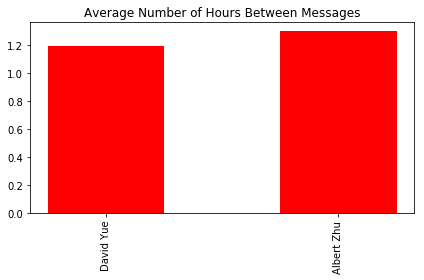

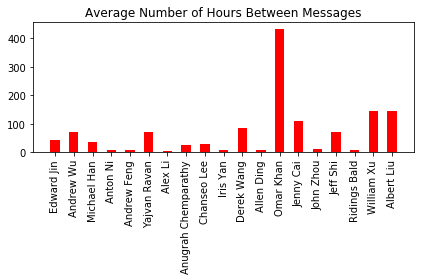

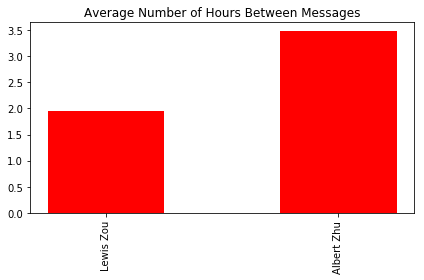

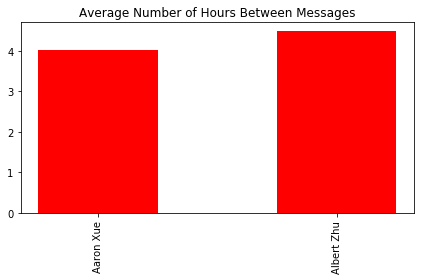

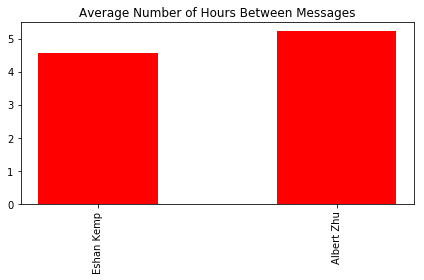

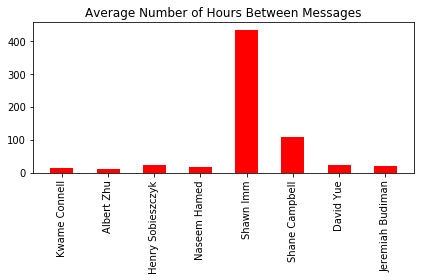

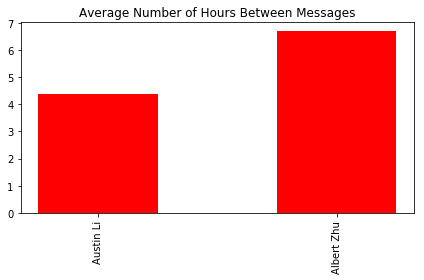

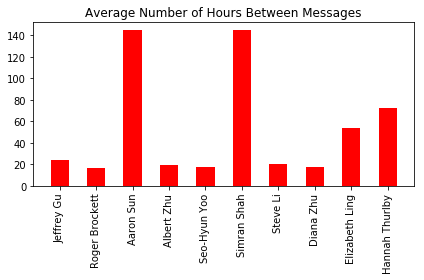

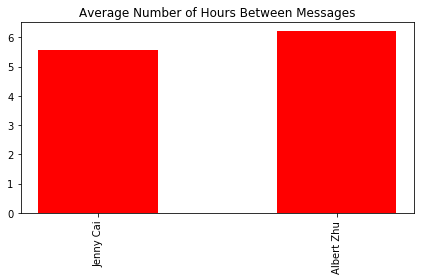

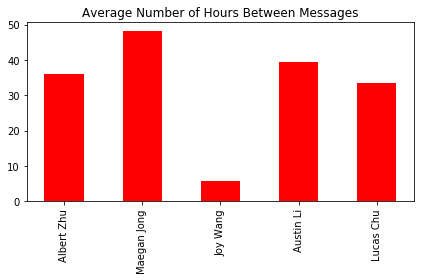

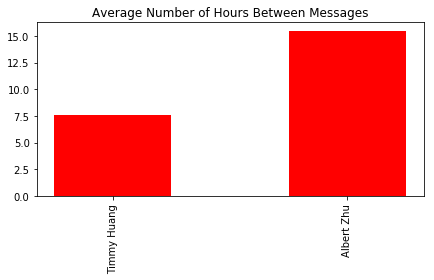

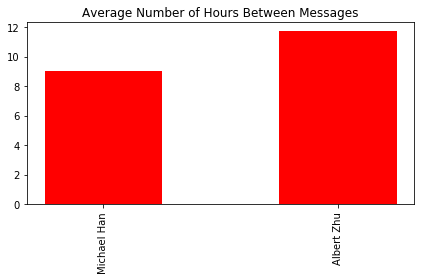

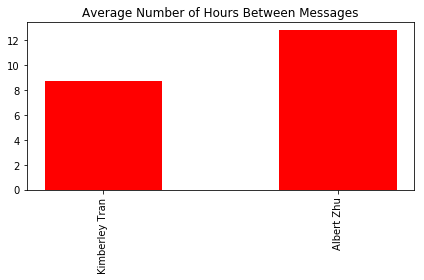

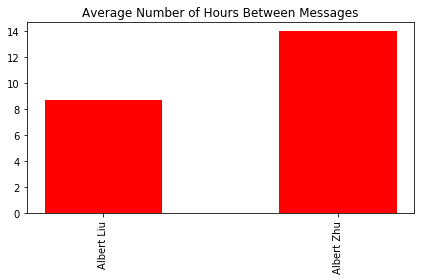

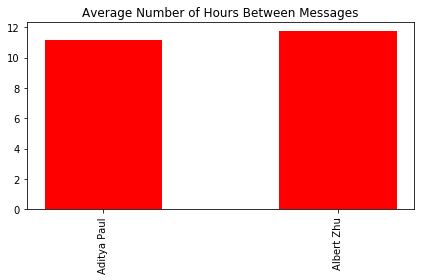

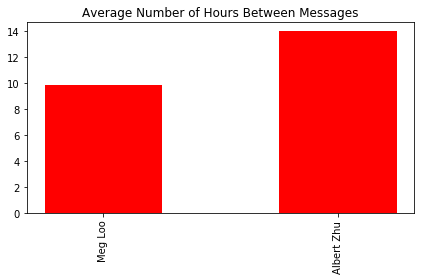

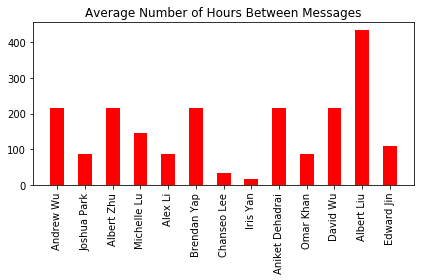

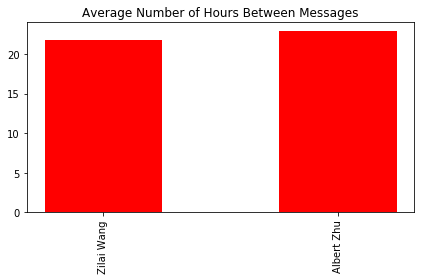

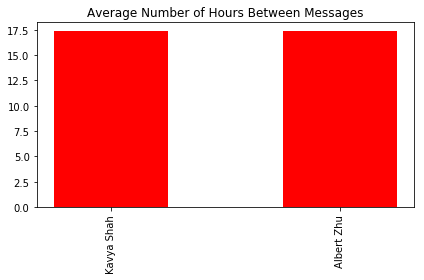

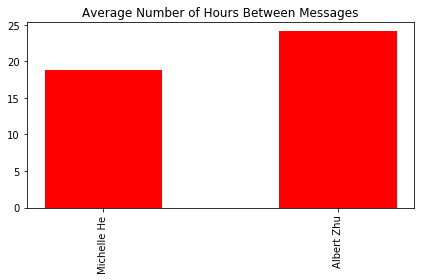

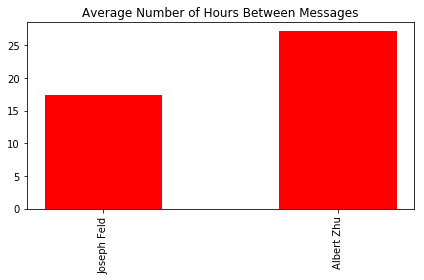

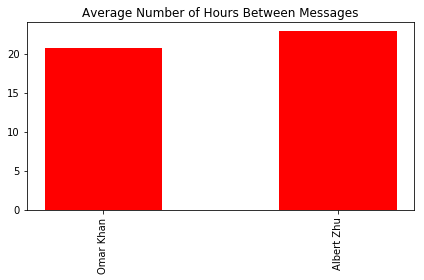

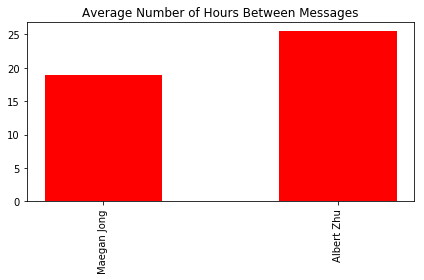

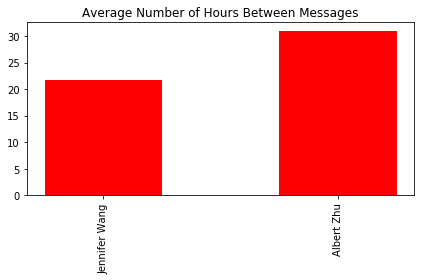

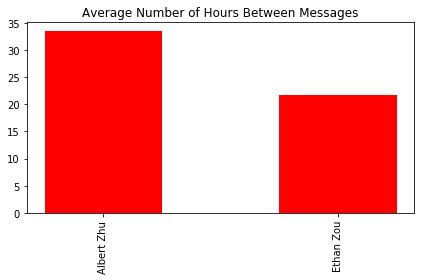

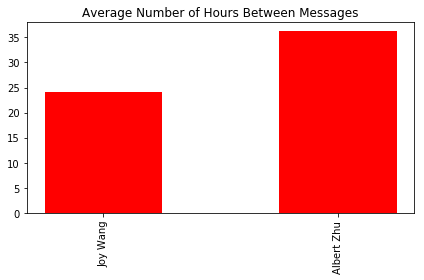

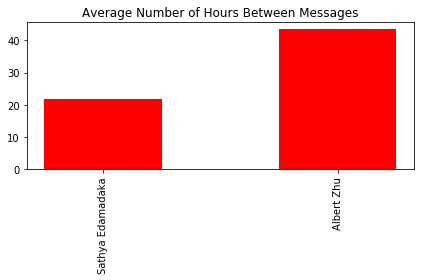

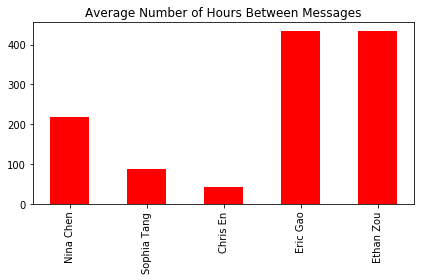

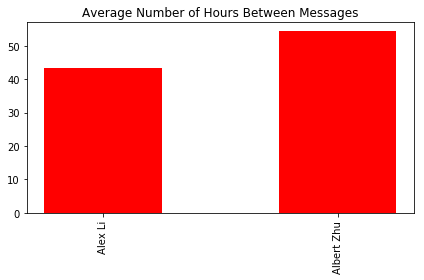

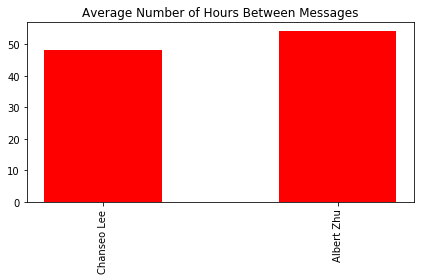

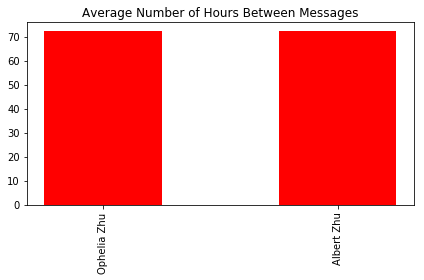

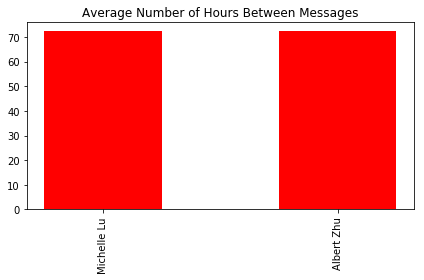

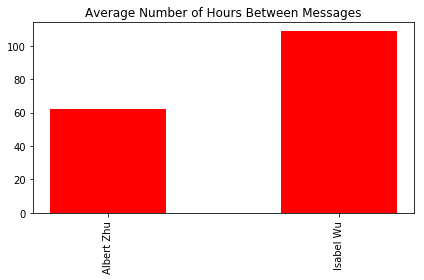

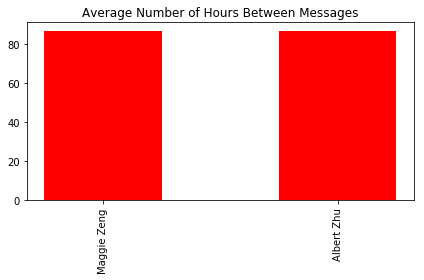

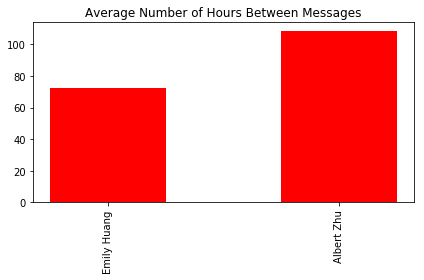

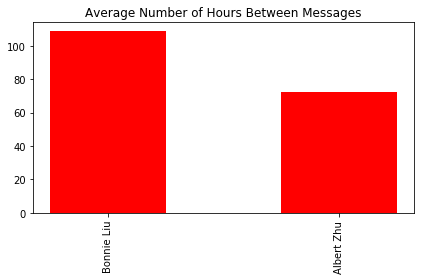

In [150]:
# Plots average number of hours between each message for each person in all chats
for i in range(0, len(sorted_chats)):
    plot_histogram_average_time_per_message(i)

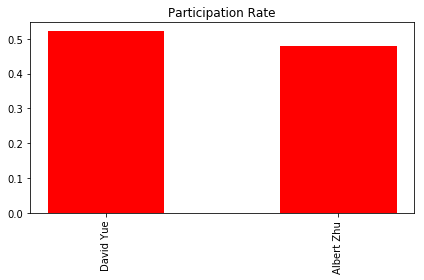

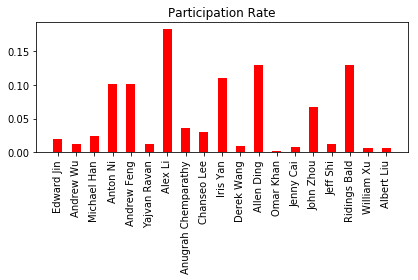

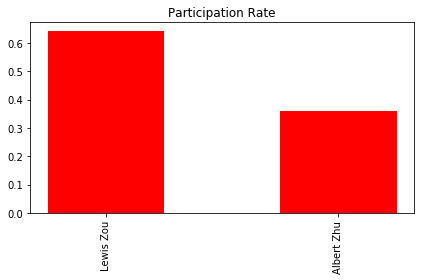

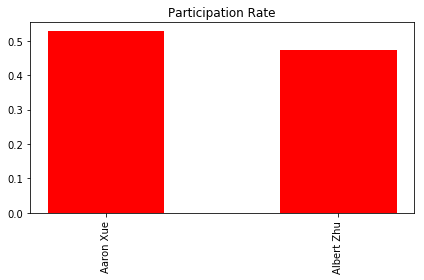

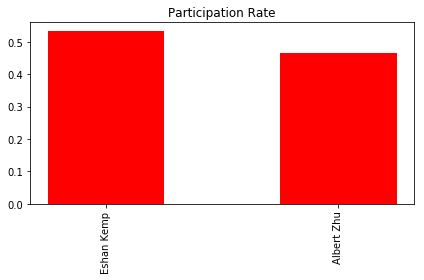

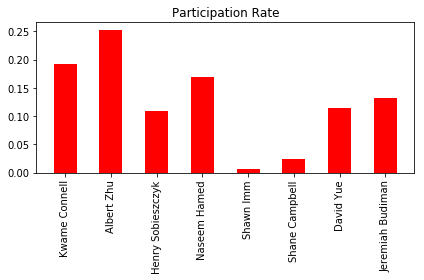

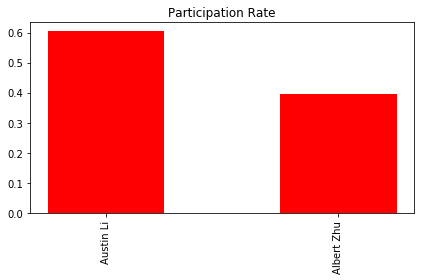

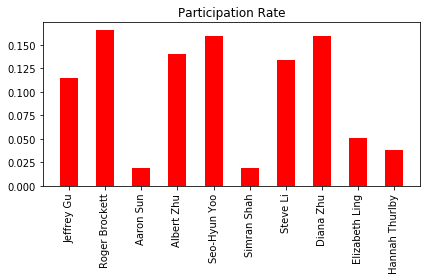

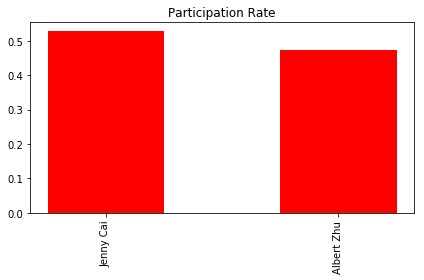

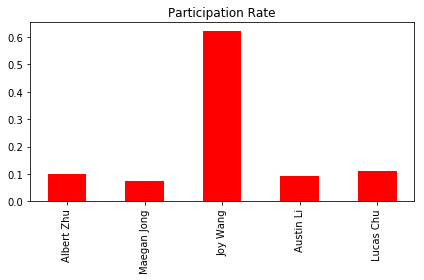

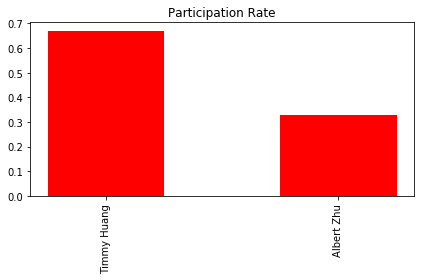

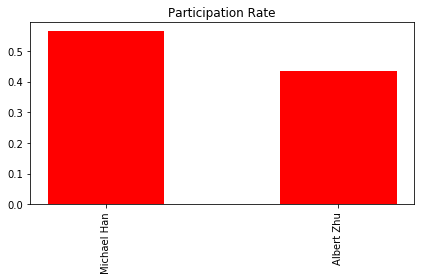

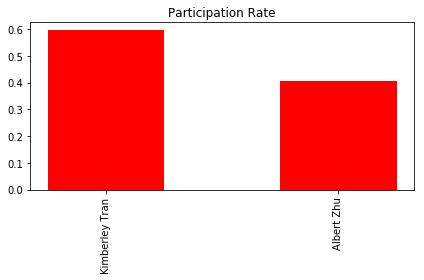

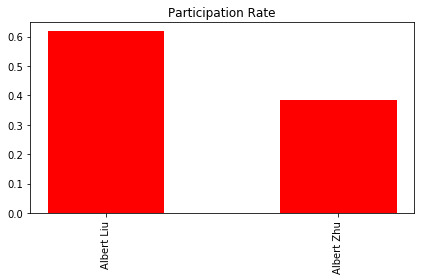

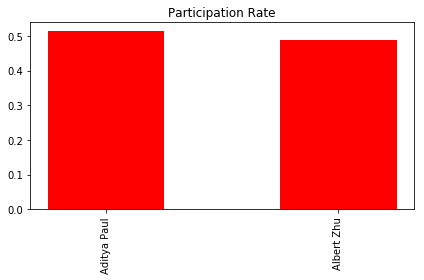

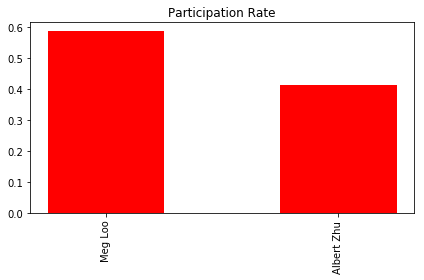

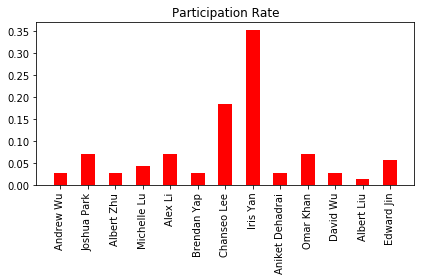

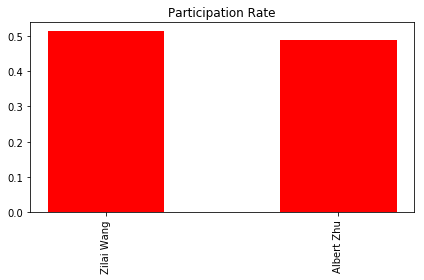

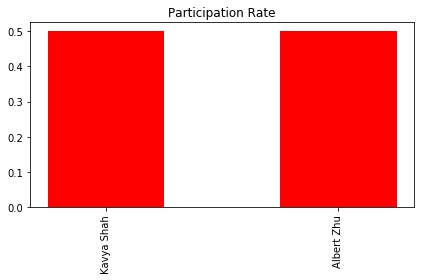

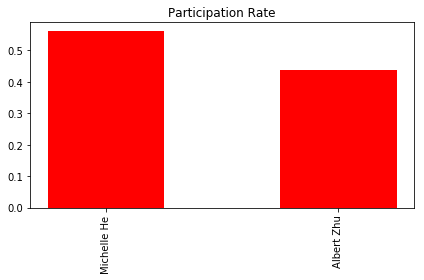

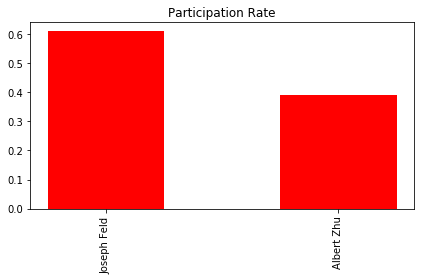

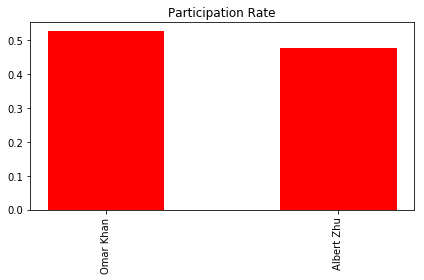

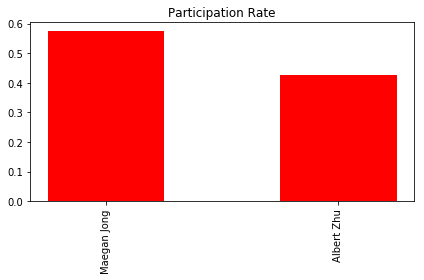

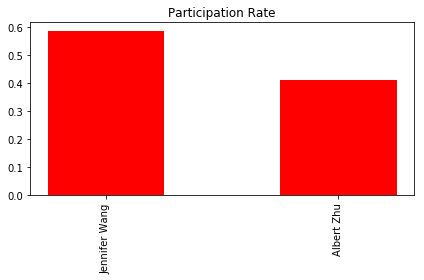

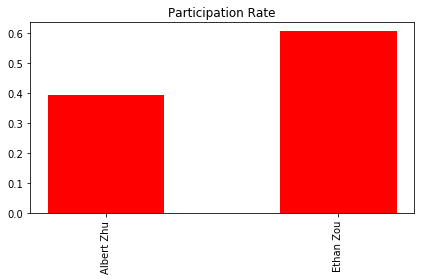

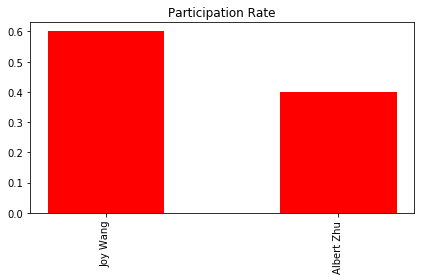

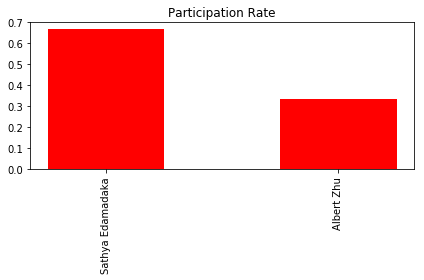

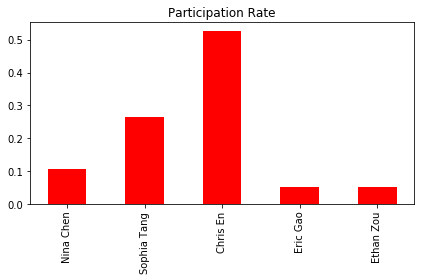

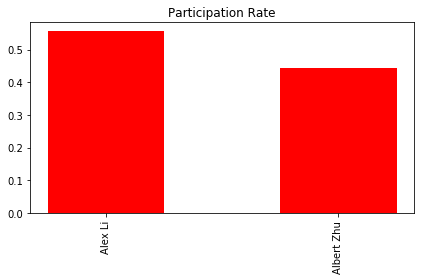

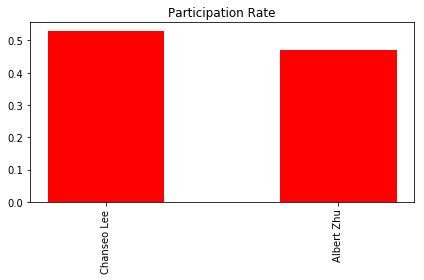

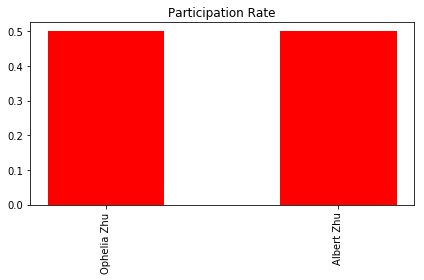

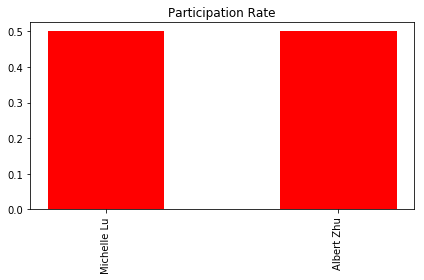

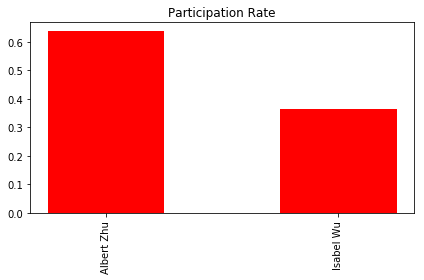

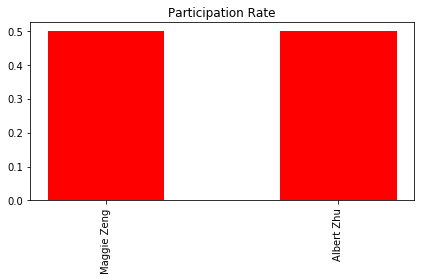

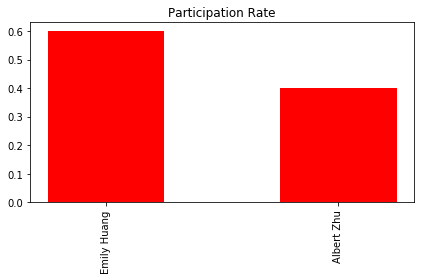

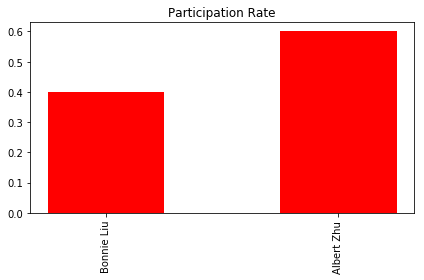

In [151]:
# Plots participation rate (each person's # of messages / total # of messages) for all chats
for i in range(0, len(sorted_chats)):
    plot_histogram_proportion_of_total_messages(i)